In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [5]:
df=pd.read_csv('mnist_train.csv')
print(df.shape)

(60000, 785)


In [6]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [7]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data=df.values
X_train=data[:,1:]
Y_train=data[:,0]
print(X_train.shape,Y_train.shape)

(60000, 784) (60000,)


In [16]:
df1=pd.read_csv('mnist_test.csv')
print(df1.shape)

(10000, 785)


In [21]:
data1=df1.values
X_test=data1[:,1:]
Y_test=data1[:,0]
print(X_test.shape,Y_test.shape)

(10000, 784) (10000,)


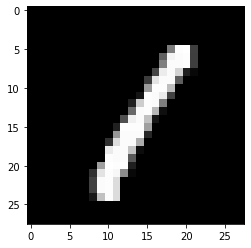

In [23]:
def drawing(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawing(X_train[3])

# K-NN

In [27]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,queryPoint, k=len(Y_train)):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

## Make Predictions

In [33]:
pred=knn(X_train,Y_train,X_test[0])
print(int(pred))

7


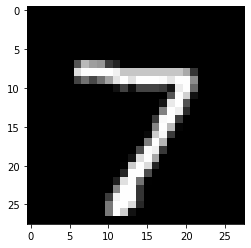

7


In [29]:
drawing(X_test[0])
print(Y_test[0])

In [35]:
def accurate(X,Y,x,y):
    count=int(0)
    for i in range(len(y)):
        pred=knn(X,Y,x[i])
        if pred!=y[i]:
            count=count+1
    return int(count*100)/len(y)

In [36]:
print(accurate(X_train,Y_train,X_test,Y_test))

0.0
